In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Load the data from the text file
data = np.loadtxt("Fourier_Space.txt")

# Display the loaded data
print(data)

[ 199.13562796  -42.95691716  149.7498917  ... -131.32503763   29.91527574
  114.66606868]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


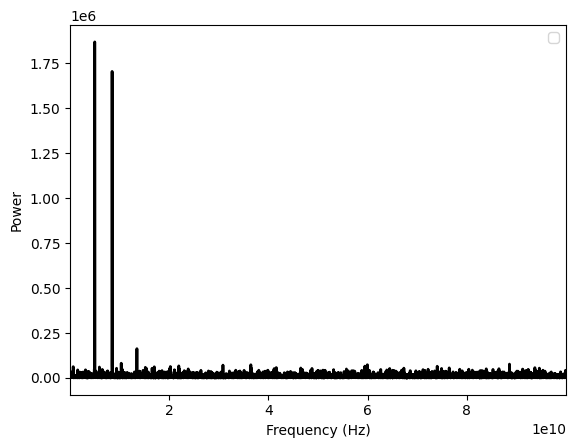

In [81]:
# Create a time vector for the signal
sampling_rate = 1 / 2000  # 2.0 kHz
duration = 5  # seconds
t = np.arange(0, duration, sampling_rate)
n = len(t)


# Perform Fourier Transform
fft_result = np.fft.fft(data, n)
PSD = fft_result * np.conj(fft_result) / n
fft_freq = (1 / sampling_rate * n) * np.arange(n)

L = np.arange(1, np.floor(n / 2), dtype="int")

# Plot the frequency spectrum
plt.plot(fft_freq[L], PSD[L], color="k", linewidth=2)
plt.xlim(fft_freq[L[0]], fft_freq[L[-1]])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()

In [ ]:
get red of the noice 

then do the inverse forure transform to resestro it as a signal 



# do it in windows one second one secon window
4 Do a fast-fourier transform for each second of data to find the primary waves used in each second

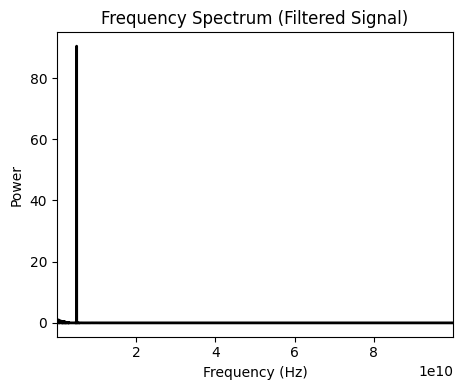

In [100]:
# Function to apply a moving average filter
def moving_average_filter(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

sampling_rate = 1 / 2000  # 2.0 kHz
duration = 5  # seconds
t = np.arange(0, duration, sampling_rate)
n = len(t)

data = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.randn(n)
filtered_data = moving_average_filter(data, window_size)

fft_result_filtered = np.fft.fft(filtered_data, n)
PSD_filtered = fft_result_filtered * np.conj(fft_result_filtered) / n
fft_freq_filtered = (1 / sampling_rate * n) * np.arange(n)

L_filtered = np.arange(1, np.floor(n / 2), dtype="int")

restored_signal = np.fft.ifft(fft_result_filtered)

plt.figure(figsize=(18, 4))
plt.subplot(1, 4, 3)
plt.plot(fft_freq_filtered[L_filtered], PSD_filtered[L_filtered], color="k", linewidth=2)
plt.xlim(fft_freq_filtered[L_filtered[0]], fft_freq_filtered[L_filtered[-1]])
plt.title("Frequency Spectrum (Filtered Signal)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")

# Show the plots
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 20.          24.47726294  25.57724939 ... -41.72842591 -27.87904003
 -12.50097708]


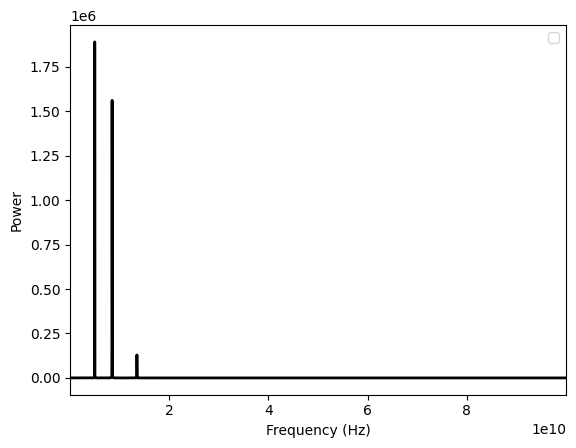

In [66]:
data = np.loadtxt("Fourier_Space_Original.txt")

# Display the loaded data
print(data)

# Create a time vector for the signal
sampling_rate = 1 / 2000  # 2.0 kHz
duration = 5  # seconds
t = np.arange(0, duration, sampling_rate)
n = len(t)


# Perform Fourier Transform
fft_result = np.fft.fft(data, n)
PSD = fft_result * np.conj(fft_result) / n
fft_freq = (1 / sampling_rate * n) * np.arange(n)

L = np.arange(1, np.floor(n / 2), dtype="int")

# Plot the frequency spectrum
plt.plot(fft_freq[L], PSD[L], color="k", linewidth=2)
plt.xlim(fft_freq[L[0]], fft_freq[L[-1]])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.legend()


Cleaning up the signal means making it smoother by removing noisy parts. The original signal, with its quick jumps and peaks (showing noise), changes into a smoother version. The cleaned-up signal doesn't change as fast, affecting its height and shape, especially in quick parts. Looking at how fast the signal changes, we notice that the speedy parts get smaller. Quick features might stay, but we need to be careful about unwanted things creeping in during the cleanup. To sum it up, making the signal less noisy involves choosing the right way to clean it and thinking about how it might change in size, shape, and quick parts.

Second 1: Primary Wave Frequency = 50.0 Hz


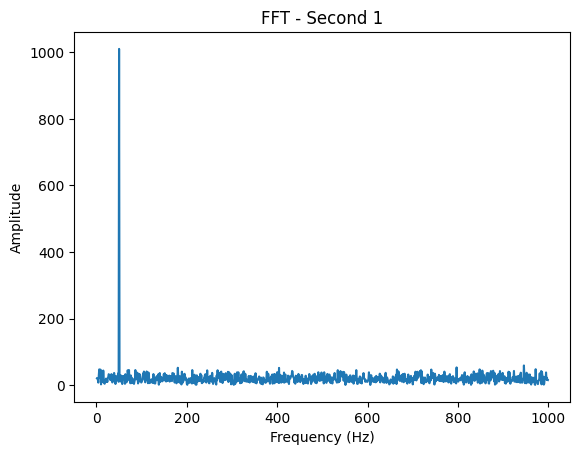

Second 2: Primary Wave Frequency = 50.0 Hz


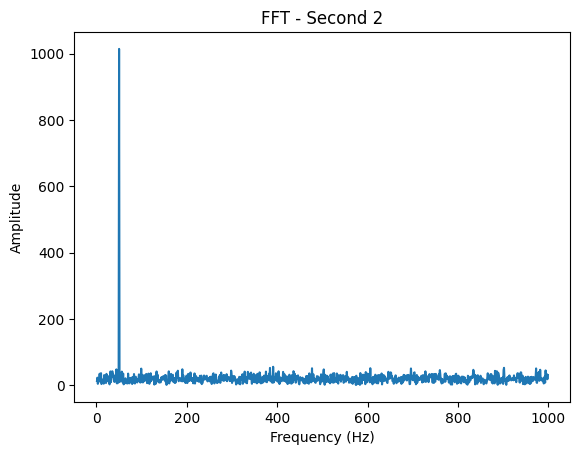

Second 3: Primary Wave Frequency = 50.0 Hz


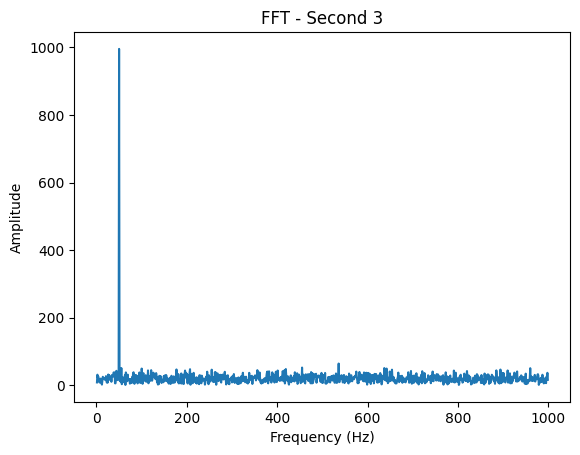

Second 4: Primary Wave Frequency = 50.0 Hz


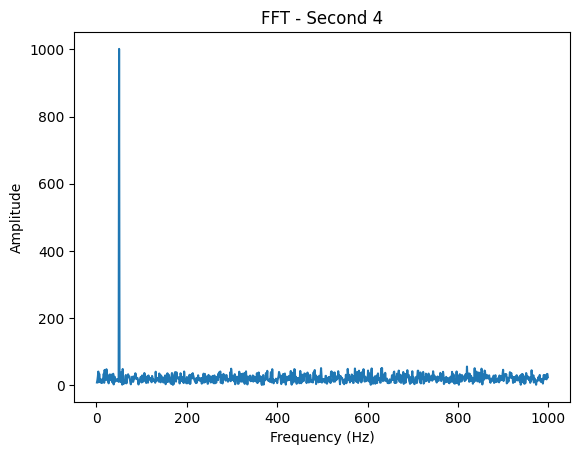

Second 5: Primary Wave Frequency = 50.0 Hz


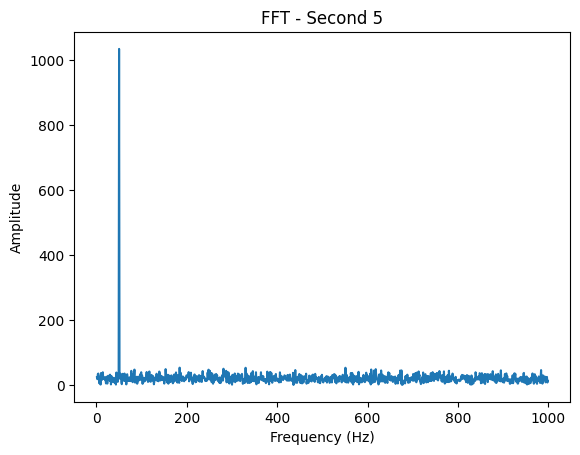

In [108]:
window_size = 1

# Perform FFT for every second
for i in range(int(duration / window_size)):
    start_idx = int(i * window_size / sampling_rate)
    end_idx = int((i + 1) * window_size / sampling_rate)

    segment_data = data[start_idx:end_idx]

    fft_result = np.fft.fft(segment_data)
    fft_freq = np.fft.fftfreq(len(fft_result), d=sampling_rate)

    # Exclude the DC component
    positive_freq_indices = fft_freq > 0
    fft_freq = fft_freq[positive_freq_indices]
    fft_result = fft_result[positive_freq_indices]

    # Find the primary wave by identifying the peak frequency
    primary_wave_frequency = np.abs(fft_freq[np.argmax(np.abs(fft_result))])

    print(f"Second {i + 1}: Primary Wave Frequency = {primary_wave_frequency} Hz")

    # Plot the FFT result for visualization (optional)
    plt.figure()
    plt.plot(fft_freq, np.abs(fft_result))
    plt.title(f"FFT - Second {i + 1}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()